### Importing the required libraries

In [1512]:


# Let's import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import warnings # supress warnings
warnings.filterwarnings('ignore')

### Importing the data set

In [1513]:
# import train csv data set

pd.set_option('display.max_columns', 500)
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1514]:
df.shape

(1460, 81)

In [1515]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### EDA


In [1516]:
### checking null values
round(100*(df.isnull().sum().sort_values(ascending = False).head(25)/len(df.index)), 2)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Id               0.00
Functional       0.00
Fireplaces       0.00
KitchenQual      0.00
KitchenAbvGr     0.00
BedroomAbvGr     0.00
dtype: float64

In [1517]:
### dropping id column as it is just identifier
df.drop('Id', inplace = True,axis =1)

In [1518]:
#### There are NA values in columns which have special meaning. mapping them to get clear picture

df['Alley'] = df['Alley'].replace(np.nan, 'No Alley')
df['BsmtQual'] = df['BsmtQual'].replace(np.nan, 'No Basement')
df['BsmtCond'] = df['BsmtCond'].replace(np.nan, 'No Basement')
df['BsmtExposure'] = df['BsmtExposure'].replace(np.nan, 'No Basement')
df['BsmtFinType1'] = df['BsmtFinType1'].replace(np.nan, 'No Basement')
df['BsmtFinType2'] = df['BsmtFinType2'].replace(np.nan, 'No Basement')
df['FireplaceQu'] = df['FireplaceQu'].replace(np.nan, 'No Fireplace')
df['GarageType'] = df['GarageType'].replace(np.nan, 'No Garage')
df['GarageFinish'] = df['GarageFinish'].replace(np.nan, 'No Garage')
df['GarageQual'] = df['GarageQual'].replace(np.nan, 'No Garage')
df['GarageCond'] = df['GarageCond'].replace(np.nan, 'No Garage')
df['PoolQC'] = df['PoolQC'].replace(np.nan, 'No Pool')
df['Fence'] = df['Fence'].replace(np.nan, 'No Fence')
df['MiscFeature'] = df['MiscFeature'].replace(np.nan, 'No MiscFeature')


In [1519]:
### checking null values again to see the remaining

round(100*(df.isnull().sum().sort_values(ascending = False).head(25)/len(df.index)), 2)

LotFrontage      17.74
GarageYrBlt       5.55
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
GrLivArea         0.00
BsmtFullBath      0.00
BsmtHalfBath      0.00
FullBath          0.00
HalfBath          0.00
GarageFinish      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu       0.00
GarageType        0.00
LowQualFinSF      0.00
2ndFlrSF          0.00
BedroomAbvGr      0.00
MSSubClass        0.00
1stFlrSF          0.00
GarageArea        0.00
SaleCondition     0.00
dtype: float64

### Obs
- Missing values in LotFrontage/GarageYr needs to be checked upon




In [1520]:
print(df.MasVnrType.value_counts())
print(df.MasVnrArea.value_counts())
print(df.Electrical.value_counts())

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
0.0       861
180.0       8
72.0        8
108.0       8
120.0       7
16.0        7
200.0       6
340.0       6
106.0       6
80.0        6
132.0       5
320.0       5
360.0       5
84.0        5
170.0       5
220.0       4
336.0       4
183.0       4
252.0       4
196.0       4
300.0       4
268.0       4
40.0        4
168.0       4
100.0       4
270.0       4
210.0       4
76.0        4
288.0       4
216.0       4
160.0       4
178.0       4
246.0       4
456.0       4
74.0        3
70.0        3
50.0        3
44.0        3
272.0       3
226.0       3
104.0       3
116.0       3
90.0        3
145.0       3
148.0       3
42.0        3
110.0       3
128.0       3
85.0        3
136.0       3
420.0       3
186.0       3
256.0       3
166.0       3
350.0       3
130.0       3
99.0        3
176.0       3
174.0       3
208.0       3
312.0       3
169.0       3
240.0       3
82.0        3
289.0       2

In [1521]:
#converting datetype for few cat columns to object from numeric
df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')
df['MSSubClass'] = df['MSSubClass'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

In [1522]:
### Analysing the columns
df.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


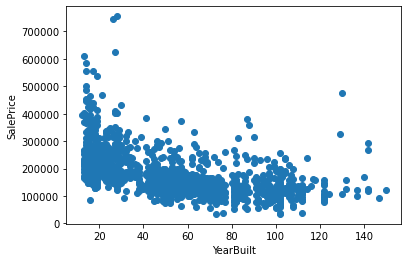

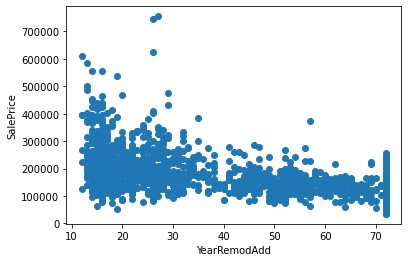

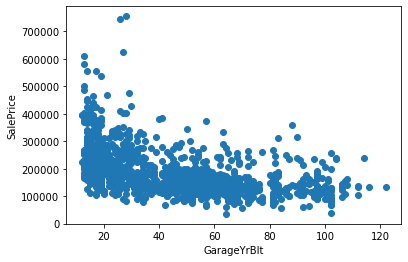

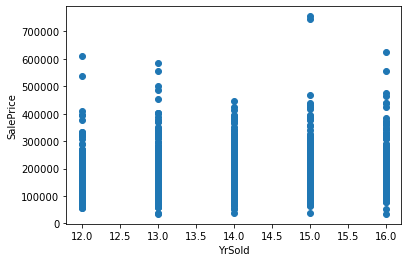

In [1523]:
year_col = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
for col in year_col:
    df[col] = 2022 - df[col]
    plt.scatter(df[col],df['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()

#### Obs
- As the house becomes older, the Sale price decreases. Also as the GarageYrBlt,YearRemodAdd gets older, SalePrice will also decrease similarly 
- No significant relation w.r.t yr sold

In [1524]:
#df.drop(columns = 'MoSold',axis =1, inplace = True)

In [1525]:
#  numerical columns 
num_col = [col for col in df.columns if df[col].dtypes != 'O']
print(len(num_col))
df[num_col].head()

34


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,19,19,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,19.0,2,548,0,61,0,0,0,0,0,2,14,208500
1,80.0,9600,46,46,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,46.0,2,460,298,0,0,0,0,0,0,5,15,181500
2,68.0,11250,21,20,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,21.0,2,608,0,42,0,0,0,0,0,9,14,223500
3,60.0,9550,107,52,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,24.0,3,642,0,35,272,0,0,0,0,2,16,140000
4,84.0,14260,22,22,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,22.0,3,836,192,84,0,0,0,0,0,12,14,250000


#### There are dicrete and continuous numerical columns which need to be analysed

In [1526]:
cat_col=[col for col in df.columns if df[col].dtypes=='O']

In [1527]:
print(len(cat_col))
df[cat_col].head()

46


,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,No Pool,No Fence,No MiscFeature,WD,Normal
1,20,RL,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,No MiscFeature,WD,Normal
2,60,RL,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,No MiscFeature,WD,Normal
3,70,RL,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,No Pool,No Fence,No MiscFeature,WD,Abnorml
4,60,RL,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,No MiscFeature,WD,Normal


In [1528]:
## segregating numerical variables which are not continuous

num_disc_col=[col for col in num_col if len(df[col].unique())<25]
print("Discrete Variables Count: {}".format(len(num_disc_col)))

Discrete Variables Count: 15


In [1529]:
df[num_disc_col].head()

,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold
0,0,1,0,2,1,3,1,8,0,2,0,0,0,2,14
1,0,0,1,2,0,3,1,6,1,2,0,0,0,5,15
2,0,1,0,2,1,3,1,6,1,2,0,0,0,9,14
3,0,1,0,1,0,3,1,7,1,3,0,0,0,2,16
4,0,1,0,2,1,4,1,9,1,3,0,0,0,12,14


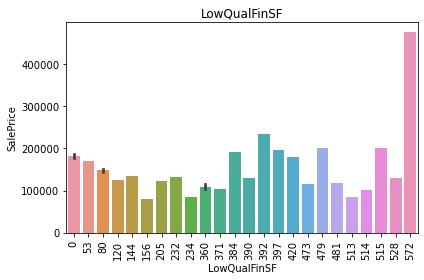

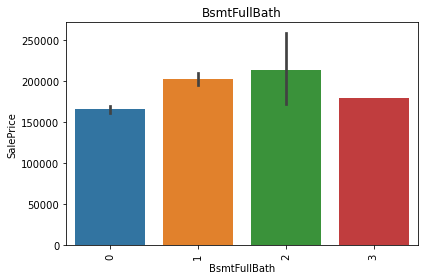

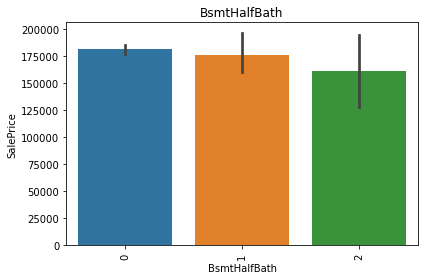

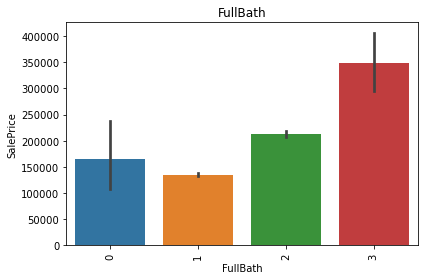

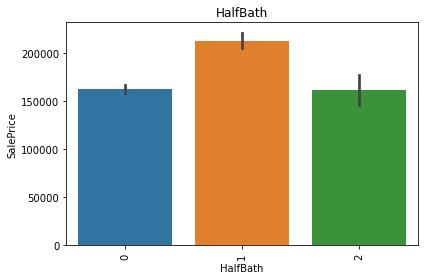

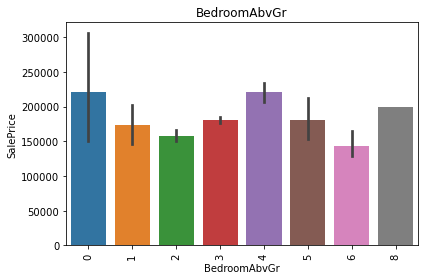

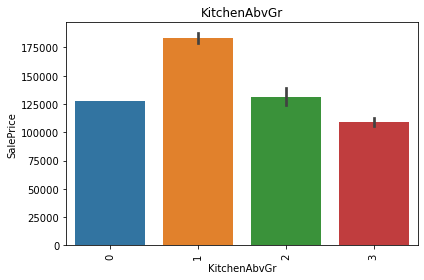

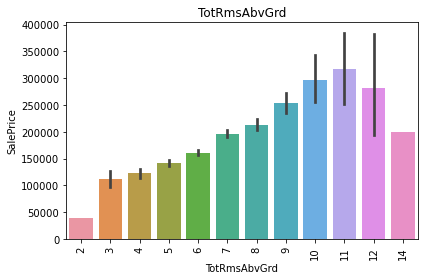

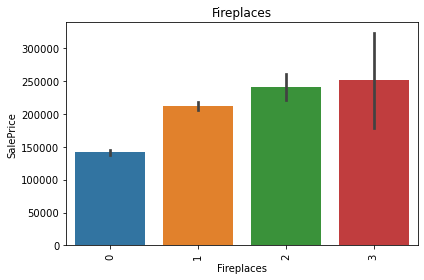

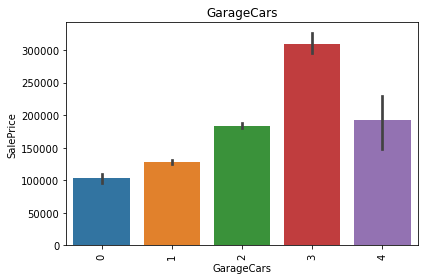

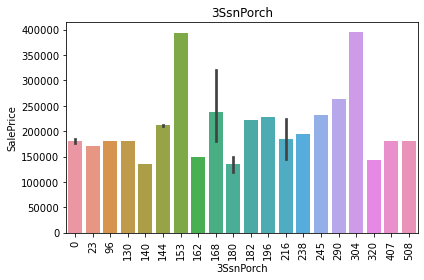

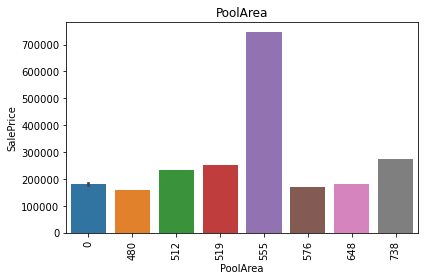

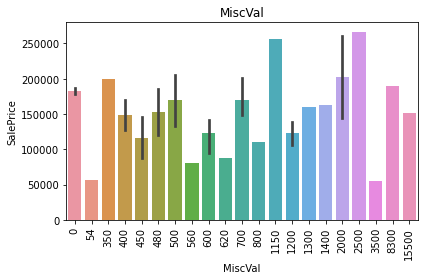

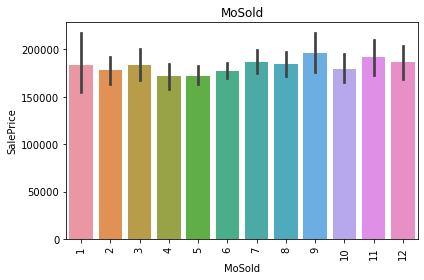

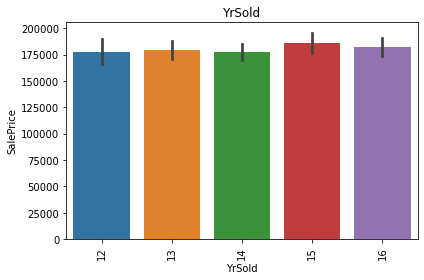

In [1530]:

for i, col in enumerate(num_disc_col):
    sns.barplot(x = col, y = 'SalePrice', data = df)
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel('SalePrice')
    plt.title(col)
    plt.tight_layout()
    plt.show()

### Obs
- Saleprice dependent on 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars'
- Having 2 bathrooms in the basemnt have higher sale price
- No BsmntHalfBath have higher sale price
- Increase in the No of fireplace has increase in saleprice
- Having 9-13 TotRmsAbvGrd has higher sale price
- Having place for 2 or 3 garage cars have higher sale price


In [1531]:
num_cont_col=[col for col in num_col if col not in num_disc_col]
print("Continuous feature Count {}".format(len(num_cont_col)))

Continuous feature Count 19


In [1532]:
df[num_cont_col].head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,19,19,196.0,706,0,150,856,856,854,1710,19.0,548,0,61,0,0,208500
1,80.0,9600,46,46,0.0,978,0,284,1262,1262,0,1262,46.0,460,298,0,0,0,181500
2,68.0,11250,21,20,162.0,486,0,434,920,920,866,1786,21.0,608,0,42,0,0,223500
3,60.0,9550,107,52,0.0,216,0,540,756,961,756,1717,24.0,642,0,35,272,0,140000
4,84.0,14260,22,22,350.0,655,0,490,1145,1145,1053,2198,22.0,836,192,84,0,0,250000


In [1533]:
percentage = {}
for col in df[num_cont_col].columns:
    IQR=df[col].quantile(0.75)-df[col].quantile(0.25)
    count=df[(df[col]>(df[col].quantile(0.75)+1.5*IQR)) | (df[col]<(df[col].quantile(0.25)-1.5*IQR))].shape[0]
    percentage[col]=round(count/df[num_col].shape[0]*100,2)


df_outlier=pd.DataFrame({'col':list(percentage.keys()),'percentage':list(percentage.values())})
df_outlier.sort_values(by="percentage", ascending=False)

,col,percentage
16,EnclosedPorch,14.25
6,BsmtFinSF2,11.44
17,ScreenPorch,7.95
4,MasVnrArea,6.58
0,LotFrontage,6.03
15,OpenPorchSF,5.27
1,LotArea,4.73
8,TotalBsmtSF,4.18
18,SalePrice,4.18
14,WoodDeckSF,2.19



### Obs
 - Outliers are present in the data. This needs to be fixed by assigning them to higher and lower whisker in the box plot 
 - Higher and lower range of box plot are 75th quantile +1.5 IQR and 25th quantile - 1.5 IQR  respectively
 

### Outlier treatment for continuous variables

In [1534]:
for col,percentage in percentage.items():
    if col!='SalePrice':
        IQR = df[col].quantile(.75) - df[col].quantile(.25) 
        max_val = df[col].quantile(.75)+1.5*IQR
        min_val = df[col].quantile(.25)-1.5*IQR
        df[col][df[col] > max_val] = max_val
        df[col][df[col] < min_val ] = min_val

#### Missing value imputation

In [1535]:
round(100*(df.isnull().sum().sort_values(ascending = False).head(25)/len(df.index)), 2)

LotFrontage      17.74
GarageYrBlt       5.55
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
GrLivArea         0.00
BsmtFullBath      0.00
BsmtHalfBath      0.00
FullBath          0.00
HalfBath          0.00
GarageFinish      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu       0.00
GarageType        0.00
LowQualFinSF      0.00
2ndFlrSF          0.00
BedroomAbvGr      0.00
MSSubClass        0.00
1stFlrSF          0.00
GarageArea        0.00
SaleCondition     0.00
dtype: float64

In [1536]:
# Replacing the numerical Missing Values
missing_val_imputation_cols = ['LotFrontage','GarageYrBlt']
for col in missing_val_imputation_cols:
    ## We will replace by using median as it is robust
    median_value=df[col].median()
    df[col].fillna(median_value,inplace=True)

In [1537]:
round(100*(df.isnull().sum().sort_values(ascending = False).head(25)/len(df.index)), 2)

MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
KitchenQual      0.00
GarageYrBlt      0.00
GarageType       0.00
FireplaceQu      0.00
Fireplaces       0.00
Functional       0.00
TotRmsAbvGrd     0.00
MSSubClass       0.00
GarageFinish     0.00
BedroomAbvGr     0.00
HalfBath         0.00
FullBath         0.00
BsmtHalfBath     0.00
BsmtFullBath     0.00
GrLivArea        0.00
LowQualFinSF     0.00
2ndFlrSF         0.00
KitchenAbvGr     0.00
GarageCars       0.00
GarageArea       0.00
PoolQC           0.00
SaleCondition    0.00
dtype: float64

In [1538]:
# Deleting the rows for missing values in MasVnrArea and replacing the missing ones in Electrical with Mode 
df = df[~np.isnan(df['MasVnrArea'])]
df.loc[pd.isnull(df['Electrical']), ['Electrical']] = 'SBrkr'


In [1539]:
round(100*(df.isnull().sum().sort_values(ascending = False).head(25)/len(df.index)), 2)

MSSubClass       0.0
MSZoning         0.0
GarageYrBlt      0.0
GarageType       0.0
FireplaceQu      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
PoolQC           0.0
SaleCondition    0.0
SaleType         0.0
dtype: float64

#### Obs
- Data cleaning is done

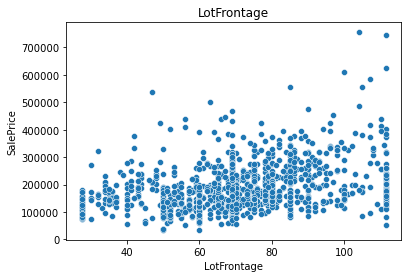

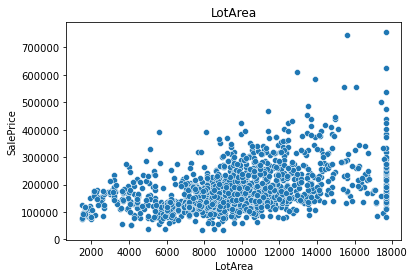

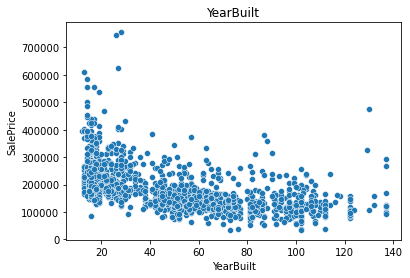

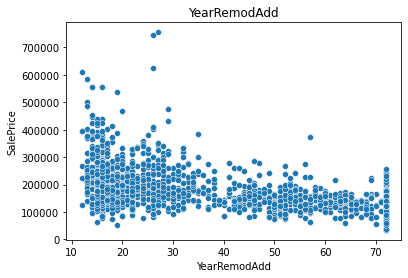

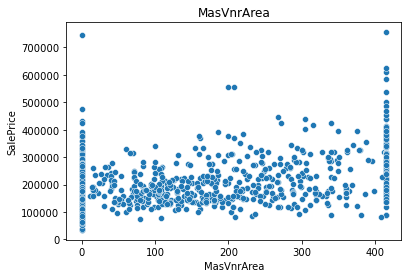

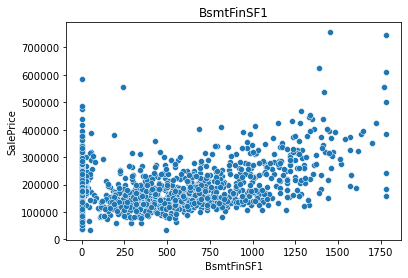

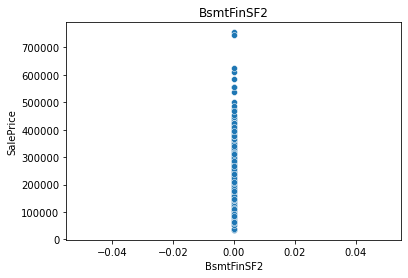

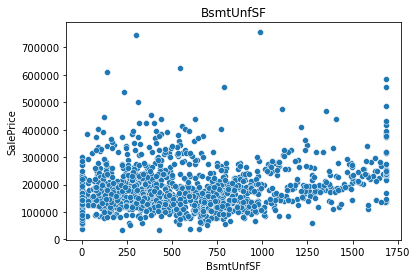

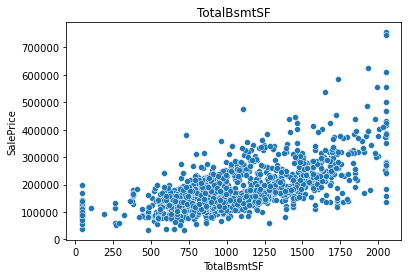

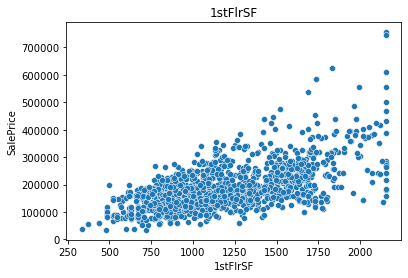

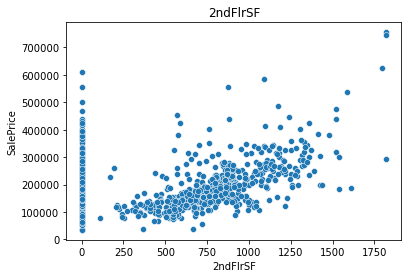

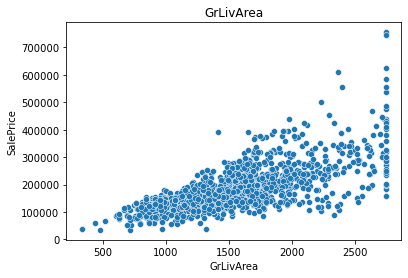

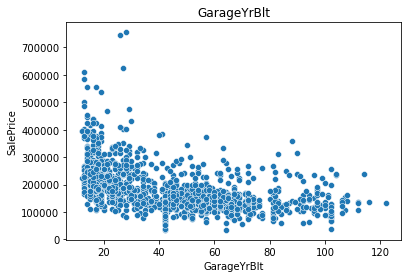

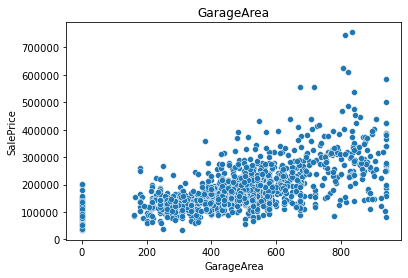

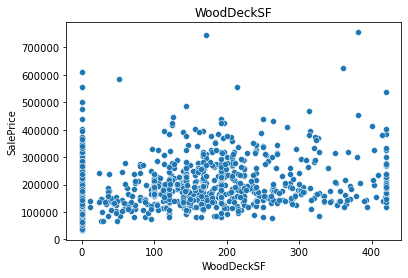

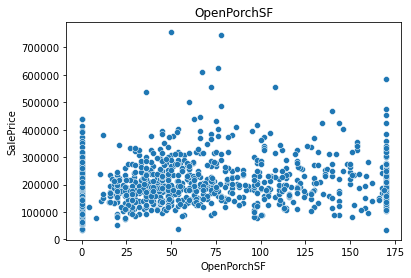

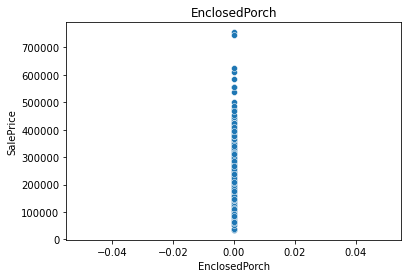

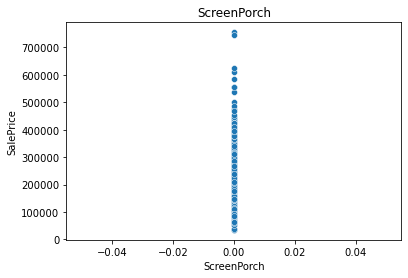

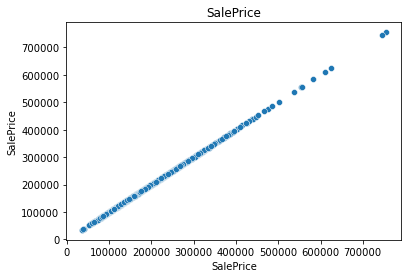

In [1540]:
for col in num_cont_col:
    sns.scatterplot(x = col, y = 'SalePrice', data = df)
    plt.xlabel(col)
    plt.ylabel("SalePrice")
    plt.title(col)
    plt.show()

### Obs

- Features like 'LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFinSF1', 'Lot Area' are showing positive correlation with SalePrice.
- 'EnclosedPorch','BsmtFinSF2','ScreenPorch' has single value
- 'YearBuilt', 'YearRemodAdd','GarageYrBlt' are negatively correlated with saleprice. As the house becomes older sale price decreases. It is inline with the thought process


In [1541]:
###Removing columns having only one value
df.drop(columns = ['EnclosedPorch','BsmtFinSF2','ScreenPorch'], inplace = True, axis =1)

### Analysing the categorical variables with SalePrice

In [1542]:
### Categorical columns analysis
df[cat_col].head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,No Pool,No Fence,No MiscFeature,WD,Normal
1,20,RL,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,No MiscFeature,WD,Normal
2,60,RL,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,No MiscFeature,WD,Normal
3,70,RL,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,No Pool,No Fence,No MiscFeature,WD,Abnorml
4,60,RL,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,No MiscFeature,WD,Normal


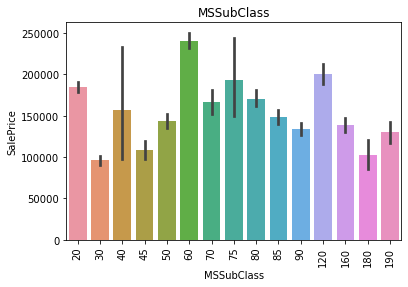

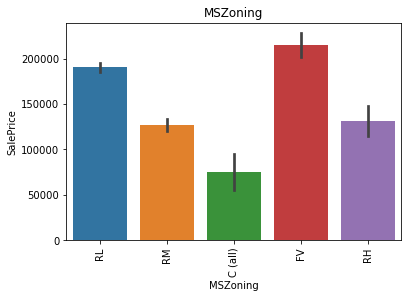

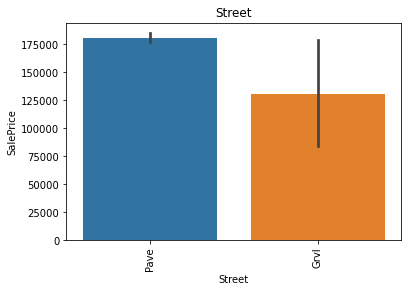

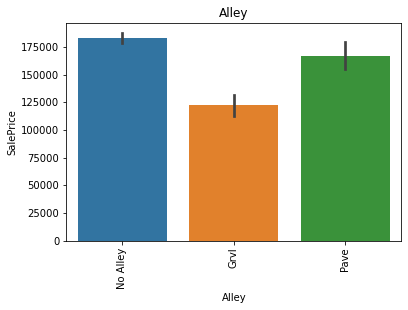

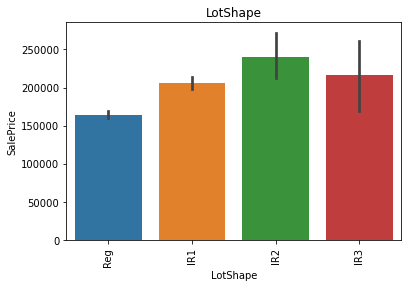

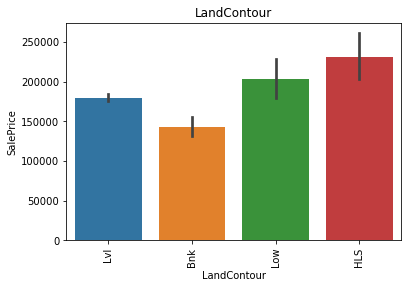

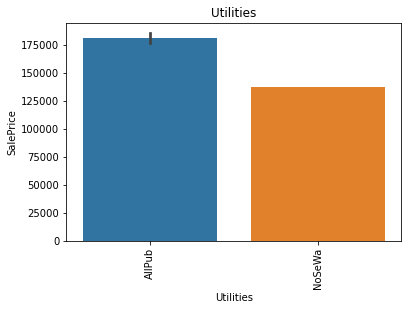

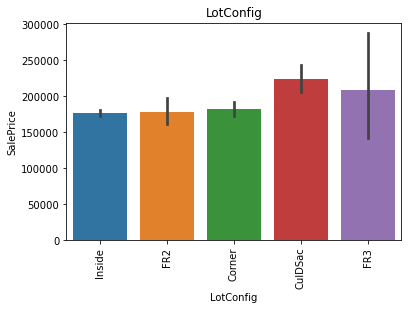

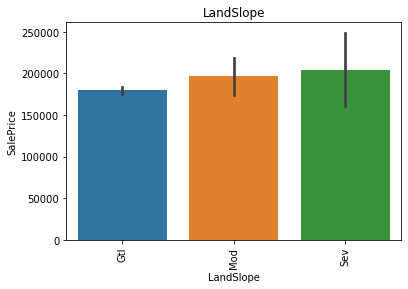

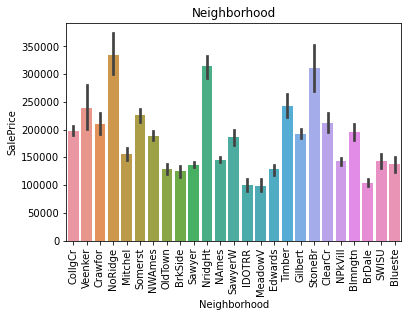

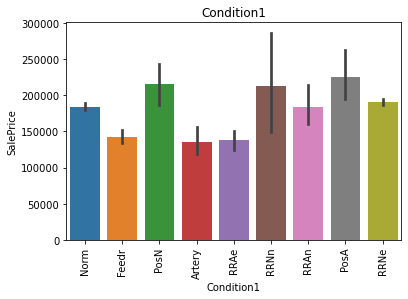

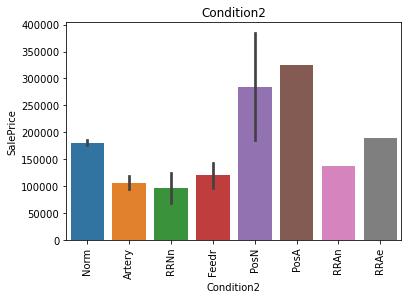

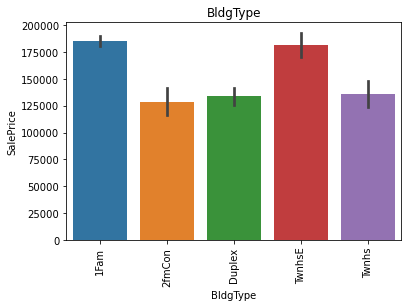

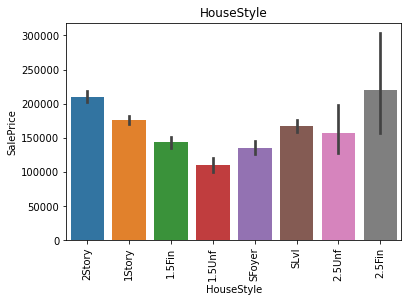

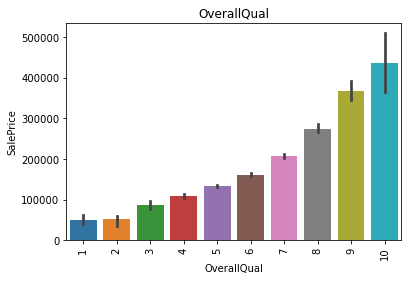

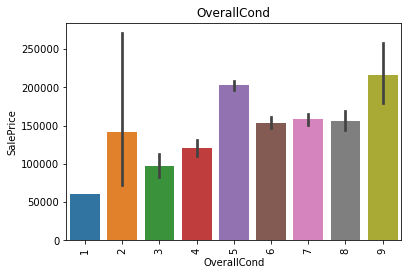

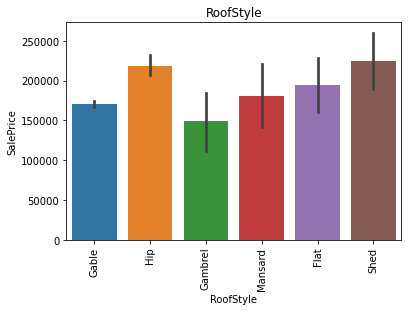

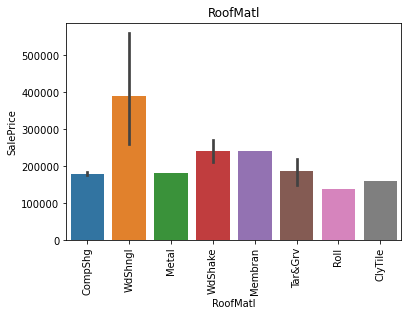

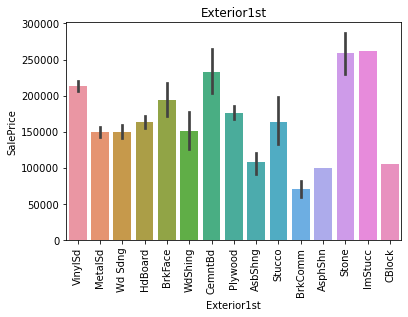

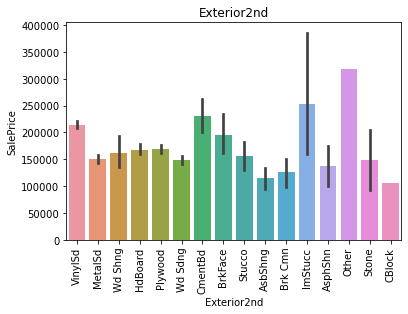

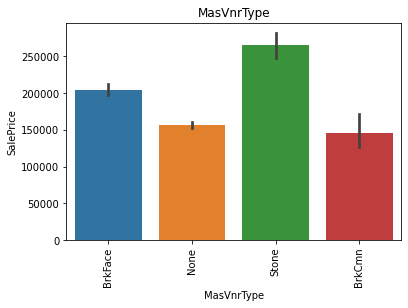

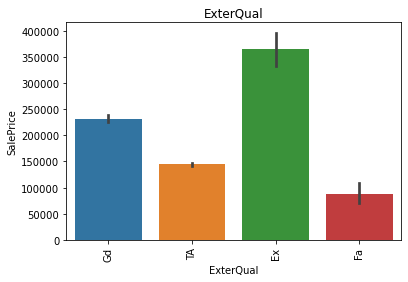

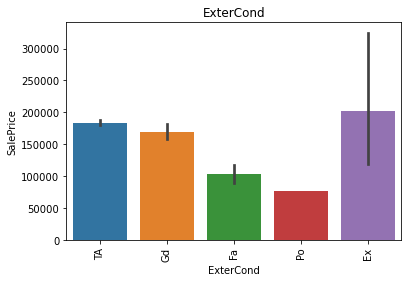

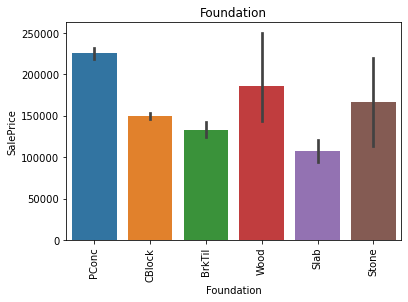

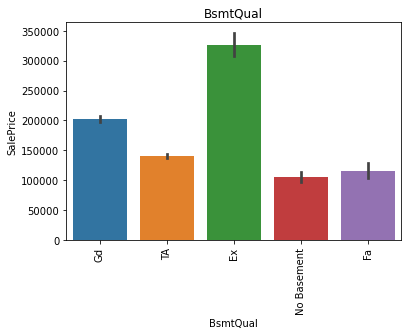

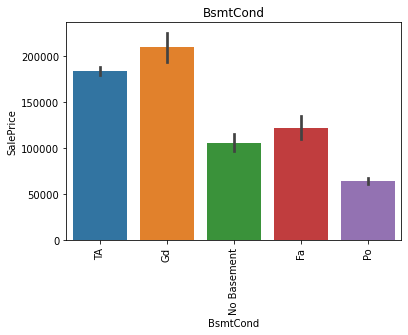

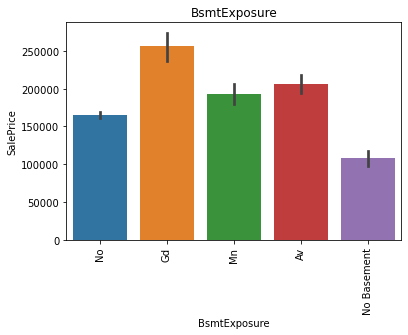

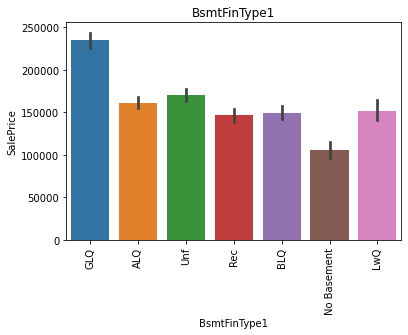

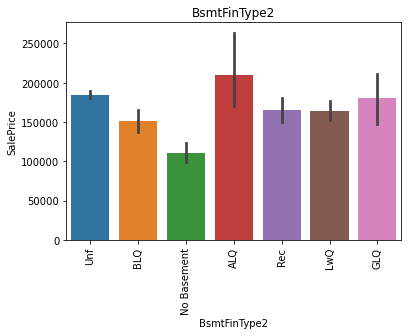

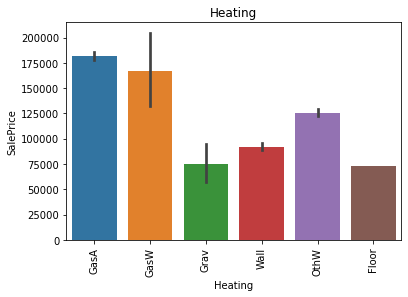

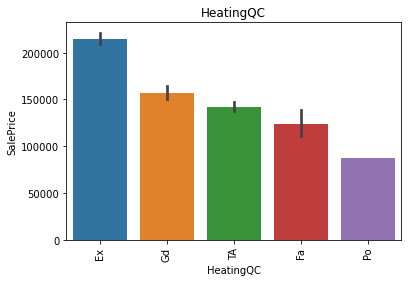

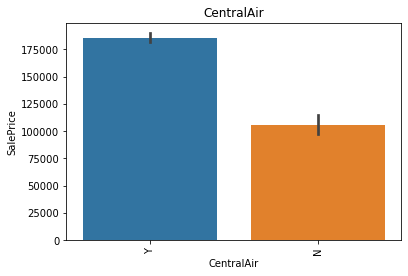

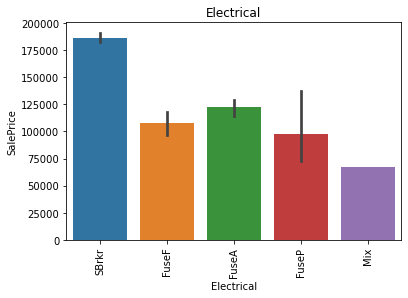

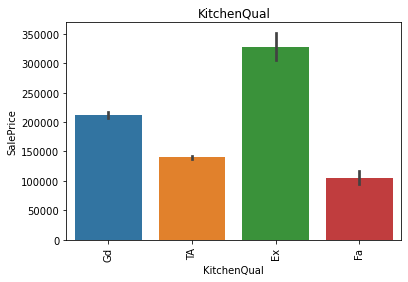

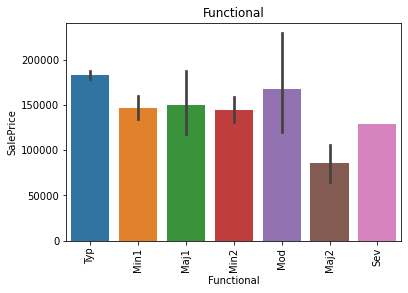

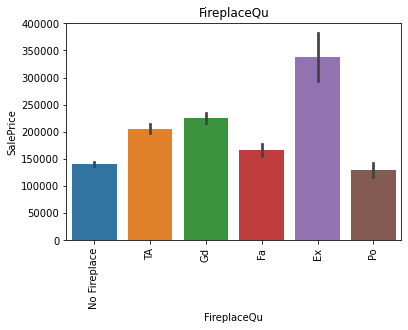

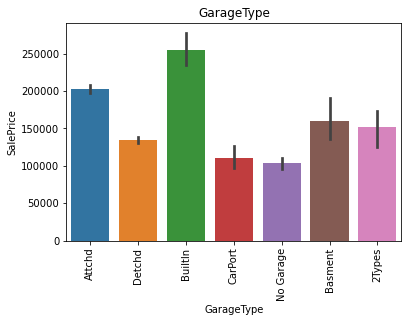

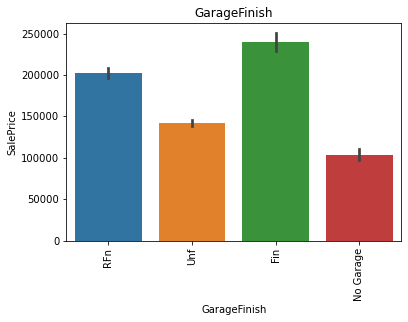

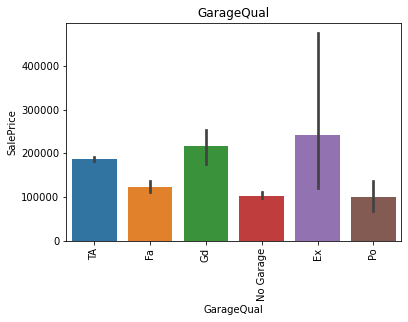

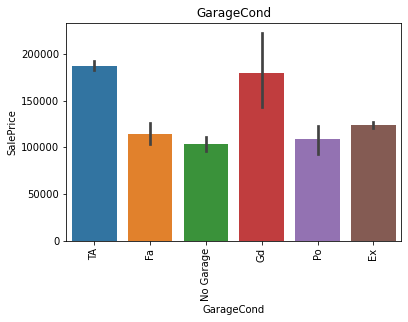

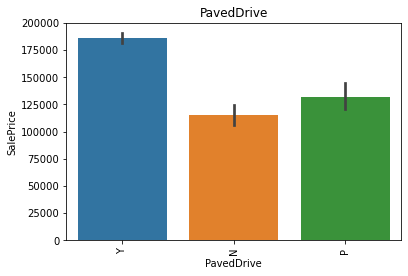

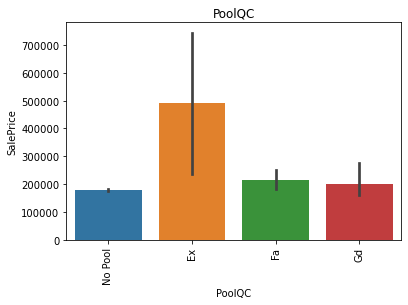

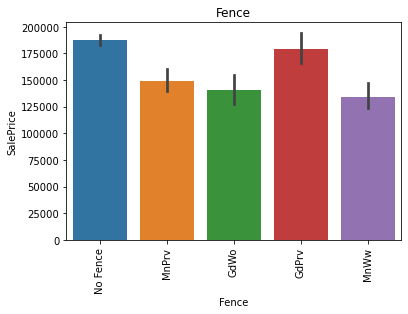

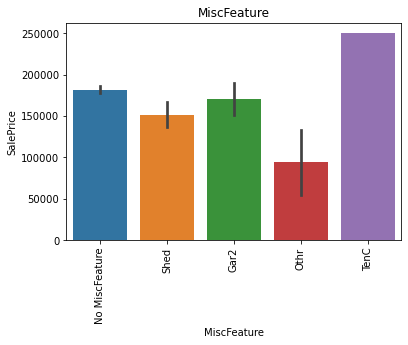

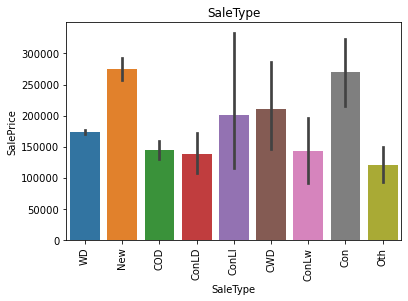

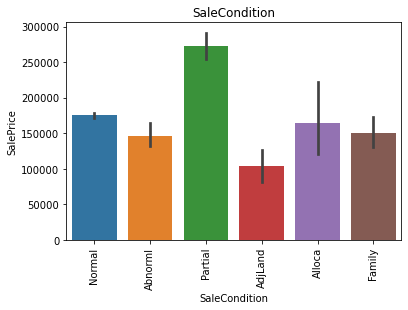

In [1543]:
for col in cat_col:
    sns.barplot(x = col, y= 'SalePrice', data =df)
    plt.xlabel(col)
    plt.xticks(rotation = 90)
    plt.ylabel('SalePrice')
    plt.title(col)
    plt.show()

### Obs
- There is dependency of categorical columns on the salesprice like MSZoning, Street,Alley, Utilities etc.,
- MSSubclass 60,75,120 have higher sale price
- MsZoning FV, RL have higher saleprice
- Street having Pavement have higher saleprice
- Lot shape having IR2(moderately irregular) have higher saleprice
- Landcontour (HLS	Hillside - Significant slope from side to side) have higher saleprice
- Utilitis AllPub(All public Utilities) have higher saleprice
- Lotconfig type CulDSac	Cul-de-sac have higher saleprice
- As OverallQual increases saleprice increases
- As overallCond increases saleprice increases
- Roofstyle shed/Hip have higher saleprice
- RoofMatl Widshngl houses have higher saleprice
- Stone MasVnrType houses have higher saleprice
- As ExterQual increased, Saleprice also increased
- As ExterCond increased, Saleprice also increased
- As BsmtQual increased, Saleprice also increased
- As Bsmtcond increased, Saleprice also increased
- As BsmtExposure increased, Saleprice also increased
- GLQ type BsmtFInType1 have higher sale price
- ALQ(Average living Qtrs) BsmtFintype2 have higher sale price
- GasA/GasW Heating type provision houses have higher saleprice
- Having CentralAC have higher saleprice
- Having SBrkr standard quality have higher sale prices
- As rating of KitchenQual/FireplaceQu/HeatingQC/GarageQual increased, saleprice increased
- Having Builtin GarageType have higher sale price
- Having Finished type GarageFinish have higher saleprice
- Having PavedDrive have higher Saleprice


In [1544]:
##applying log transformation as saleprice scale is very much different
#df['SalePrice']=np.log(df['SalePrice'])

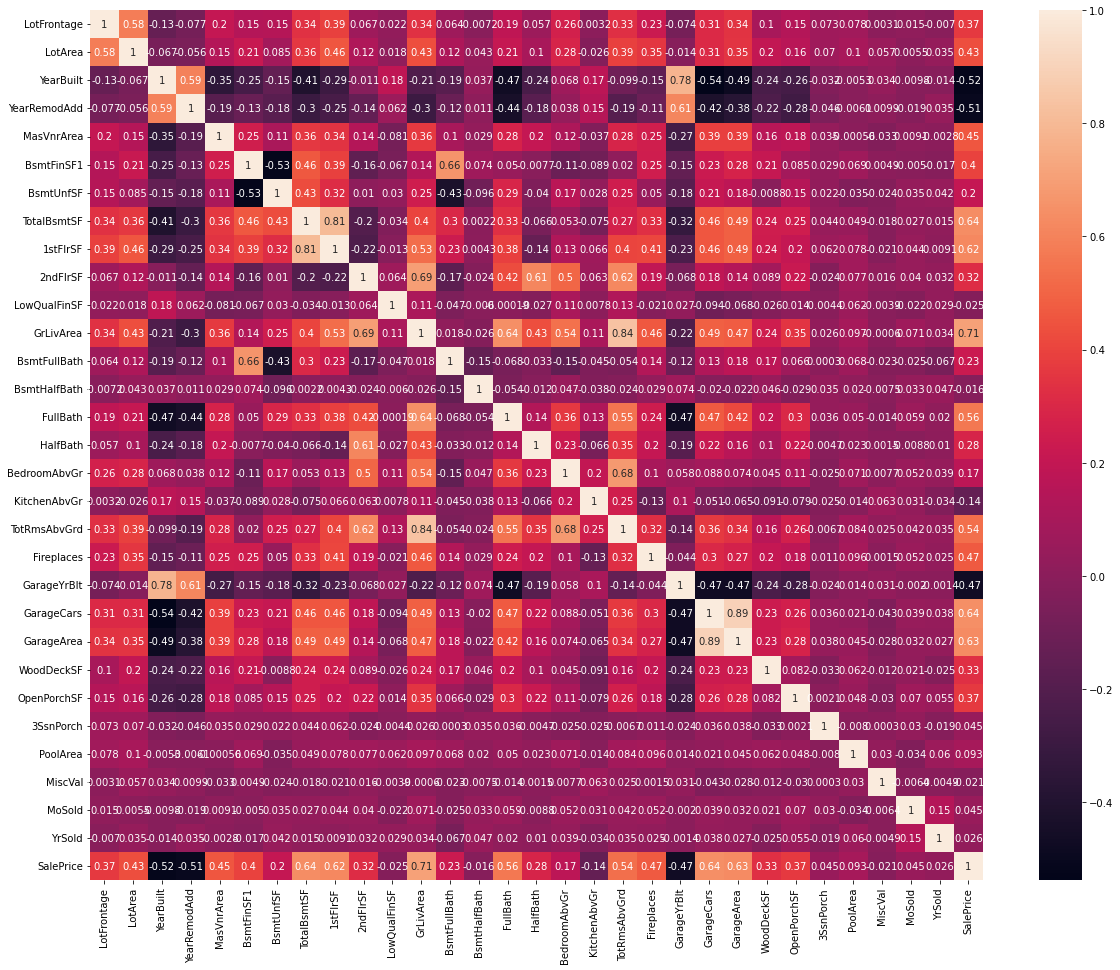

In [1545]:
# correlation heat map
num_col.remove('EnclosedPorch')
num_col.remove('BsmtFinSF2')
num_col.remove('ScreenPorch')


plt.figure(figsize=(20,16))
sns.heatmap(df[num_col].corr(),annot=True)
plt.show()


### Obs
- There is high correlation between few features.



In [1546]:
### checking the correlation matrix pairs which have correlation greater than 0.7
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
df_corr = pd.DataFrame(so)
#df_corr.columns = ['correlations']
print(df_corr[(df_corr[0] < 1) & (df_corr[0] > 0.7)])

                                  0
GarageArea   GarageCars    0.892634
GarageCars   GarageArea    0.892634
TotRmsAbvGrd GrLivArea     0.835685
GrLivArea    TotRmsAbvGrd  0.835685
TotalBsmtSF  1stFlrSF      0.805300
1stFlrSF     TotalBsmtSF   0.805300
YearBuilt    GarageYrBlt   0.777763
GarageYrBlt  YearBuilt     0.777763
GrLivArea    SalePrice     0.709562
SalePrice    GrLivArea     0.709562


In [1547]:
####mapping categorical variable which can be usefull for easy story telling
def map_class(x):
    return x.map({20: '1strynewer', 30: '1stryolder',40:'1stryfin',45:'1.5stryunfin',50:'1.5stryunfin',60:'2strynewer',70:'2stryolder',75:'2.5stry',80:'splitmultlvl',85:'splitfoyer',90:'Duplex',120:'1strypud',150:'1.5strypud',160:'2strypud',180:'pudmultlvl',190:'2family'})
df[['MSSubClass']] = df[['MSSubClass']].apply(map_class)


def map_overallq(x):
    return x.map({1:'vpoor',2:'poor',3:'fair',4:'Bavg',5:'avg',6:'abvavg',7:'good',8:'vgood',9:'excellent',10:'vexcellent'})
df[['OverallQual']]= df[['OverallQual']].apply(map_overallq)


df[['OverallCond']]= df[['OverallCond']].apply(map_overallq)



In [1548]:
##one hot encoding for all category columns
one_hot_encoded_data = pd.get_dummies(df[cat_col],drop_first = True)
df1 = pd.concat([df, one_hot_encoded_data], axis=1)

In [1549]:

df1.drop(cat_col, axis =1 , inplace = True)

In [1550]:
df1.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_1stryfin,MSSubClass_1strynewer,MSSubClass_1stryolder,MSSubClass_1strypud,MSSubClass_2.5stry,MSSubClass_2family,MSSubClass_2strynewer,MSSubClass_2stryolder,MSSubClass_2strypud,MSSubClass_Duplex,MSSubClass_pudmultlvl,MSSubClass_splitfoyer,MSSubClass_splitmultlvl,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_abvavg,OverallQual_avg,OverallQual_excellent,OverallQual_fair,OverallQual_good,OverallQual_poor,OverallQual_vexcellent,OverallQual_vgood,OverallQual_vpoor,OverallCond_abvavg,OverallCond_avg,OverallCond_excellent,OverallCond_fair,OverallCond_good,OverallCond_poor,OverallCond_vgood,OverallCond_vpoor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageT

In [1551]:
df1.shape

(1452, 284)

 ### Splitting the Data into Training and Testing Sets

In [1552]:
X = df1.drop(['SalePrice'], axis=1)
X.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_1stryfin,MSSubClass_1strynewer,MSSubClass_1stryolder,MSSubClass_1strypud,MSSubClass_2.5stry,MSSubClass_2family,MSSubClass_2strynewer,MSSubClass_2stryolder,MSSubClass_2strypud,MSSubClass_Duplex,MSSubClass_pudmultlvl,MSSubClass_splitfoyer,MSSubClass_splitmultlvl,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_abvavg,OverallQual_avg,OverallQual_excellent,OverallQual_fair,OverallQual_good,OverallQual_poor,OverallQual_vexcellent,OverallQual_vgood,OverallQual_vpoor,OverallCond_abvavg,OverallCond_avg,OverallCond_excellent,OverallCond_fair,OverallCond_good,OverallCond_poor,OverallCond_vgood,OverallCond_vpoor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPor

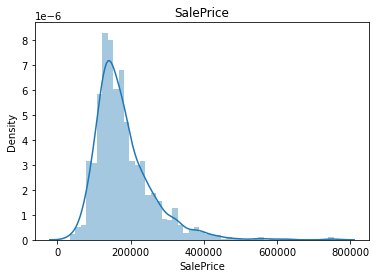

In [1553]:
# Checking the distribution of target variable, SalePrice

plt.title('SalePrice')
sns.distplot(df1['SalePrice'])
plt.show()

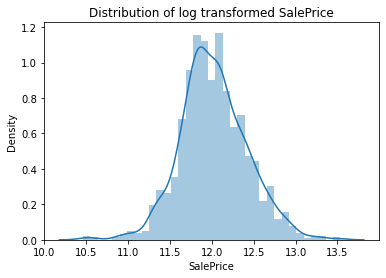

In [1554]:
##applying log transformation as it is skewed
sns.distplot(np.log(df1['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [1555]:
# log transformed SalePrice is normally distributed, hence transformed data will be used for model building

#y = np.log(df1['SalePrice'])


In [1556]:
df1['SalePrice'] = np.log(df1['SalePrice'])

In [1557]:
# split into train and test
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    #train_size=0.7,
                                                    #test_size = 0.3, random_state=100)
df1_train, df1_test = train_test_split(df1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1558]:
df1_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_1stryfin,MSSubClass_1strynewer,MSSubClass_1stryolder,MSSubClass_1strypud,MSSubClass_2.5stry,MSSubClass_2family,MSSubClass_2strynewer,MSSubClass_2stryolder,MSSubClass_2strypud,MSSubClass_Duplex,MSSubClass_pudmultlvl,MSSubClass_splitfoyer,MSSubClass_splitmultlvl,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_abvavg,OverallQual_avg,OverallQual_excellent,OverallQual_fair,OverallQual_good,OverallQual_poor,OverallQual_vexcellent,OverallQual_vgood,OverallQual_vpoor,OverallCond_abvavg,OverallCond_avg,OverallCond_excellent,OverallCond_fair,OverallCond_good,OverallCond_poor,OverallCond_vgood,OverallCond_vpoor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageT

In [1559]:
df1_train.shape

(1016, 284)

In [1560]:
# taking numerical columns again as we have removed few of them
num_scaling_col_df = df1_train.drop(one_hot_encoded_data,axis=1)
num_scaling_col_df = df1_train.drop(['SalePrice'],axis=1)
num_scaling_col = num_scaling_col_df.columns
#num_scaling_col = 
print(len(num_scaling_col))
df1_train[num_scaling_col].head()

283


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_1stryfin,MSSubClass_1strynewer,MSSubClass_1stryolder,MSSubClass_1strypud,MSSubClass_2.5stry,MSSubClass_2family,MSSubClass_2strynewer,MSSubClass_2stryolder,MSSubClass_2strypud,MSSubClass_Duplex,MSSubClass_pudmultlvl,MSSubClass_splitfoyer,MSSubClass_splitmultlvl,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_abvavg,OverallQual_avg,OverallQual_excellent,OverallQual_fair,OverallQual_good,OverallQual_poor,OverallQual_vexcellent,OverallQual_vgood,OverallQual_vpoor,OverallCond_abvavg,OverallCond_avg,OverallCond_excellent,OverallCond_fair,OverallCond_good,OverallCond_poor,OverallCond_vgood,OverallCond_vpoor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPor

In [1561]:
y_train = df1_train.pop('SalePrice')


#### Scaling Training set vars

In [1562]:
scaler = MinMaxScaler()

#X_train[num_scaling_col] = scaler.fit_transform(X_train[num_scaling_col])
df1_train[num_scaling_col] = scaler.fit_transform(df1_train[num_scaling_col])

In [1563]:

X_train = df1_train

#### Scaling test set vars

In [1564]:
y_test = df1_test.pop('SalePrice')
df1_test[num_scaling_col] = scaler.transform(df1_test[num_scaling_col])
df1_test.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_1stryfin,MSSubClass_1strynewer,MSSubClass_1stryolder,MSSubClass_1strypud,MSSubClass_2.5stry,MSSubClass_2family,MSSubClass_2strynewer,MSSubClass_2stryolder,MSSubClass_2strypud,MSSubClass_Duplex,MSSubClass_pudmultlvl,MSSubClass_splitfoyer,MSSubClass_splitmultlvl,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_abvavg,OverallQual_avg,OverallQual_excellent,OverallQual_fair,OverallQual_good,OverallQual_poor,OverallQual_vexcellent,OverallQual_vgood,OverallQual_vpoor,OverallCond_abvavg,OverallCond_avg,OverallCond_excellent,OverallCond_fair,OverallCond_good,OverallCond_poor,OverallCond_vgood,OverallCond_vpoor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPor

In [1565]:
X_test = df1_test

### Model Building and Evaluation

#### Building Linear regression model

In [1566]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [1567]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

7099613918.723741
[ 4.72965373e-02  1.15847768e-01 -2.23786618e-01 -4.62767362e-02
 -9.42999088e-03  1.23317195e-01  7.15039482e-02  1.32637533e-01
  1.66099372e-01  2.75292988e-01  1.03433248e-01  2.93318102e-01
  1.39766605e-01  2.10896096e-02  9.37813629e-02  7.19776153e-02
 -8.63800839e-02 -2.42798677e-01  3.23642998e-02  7.12446818e-02
 -9.41402261e-03  6.91510809e-02  1.02467512e-01  3.74045975e-02
  1.13625117e-02  7.76192364e-02  2.26434032e+00  1.68387949e-01
  2.15847020e-03  2.48262640e-03 -5.33459294e-01 -6.54774571e-02
 -1.74447844e-01 -9.09906646e-02 -2.21009841e-01  3.83739519e-03
 -4.77213720e-02  1.72557725e-02 -1.42627724e-01 -2.39922072e+10
 -1.39291871e-01 -1.57312051e-02 -8.85415329e-02  4.92251152e-01
  4.31267604e-01  4.46691139e-01  4.23152068e-01  2.96945248e-02
 -9.05830722e-03  4.50320958e-02  4.39516752e-03  4.64183651e-02
  8.22358956e-03 -7.75945629e-03 -2.51777677e-02  8.78442498e-03
 -2.01805125e-01  3.40290307e-02 -1.50051144e-02 -6.32895630e-02
 -1.255

In [1568]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9553465903782307
-1.4913752448872094e+19
6.970887429999959
1.1231431322187225e+21
0.00686110967519681
2.576016358299822e+18


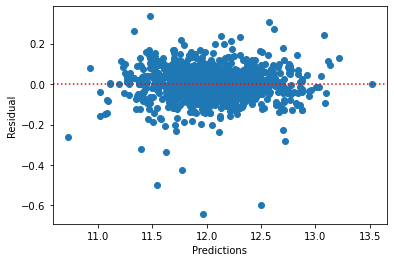

In [1569]:
# Residual analysis
y_res = y_train - y_pred_train
#X_train['res'] = y_res
plt.scatter( y_pred_train , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

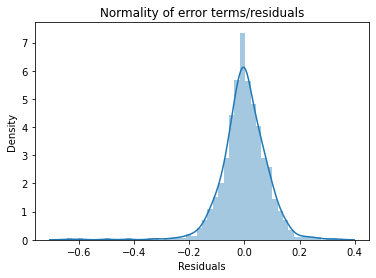

In [1570]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

#### Obs
- Normality condition/Homoscedasticity assumptions of linear regression are satisfied

### Linear regression using RFE

In [1571]:
### RFE based selecting feature columns

rfe = RFE(lm, 50)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [1572]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 75),
 ('LotArea', False, 27),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 15),
 ('MasVnrArea', False, 207),
 ('BsmtFinSF1', False, 30),
 ('BsmtUnfSF', False, 110),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 122),
 ('2ndFlrSF', False, 35),
 ('LowQualFinSF', False, 118),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 144),
 ('FullBath', False, 46),
 ('HalfBath', False, 67),
 ('BedroomAbvGr', False, 22),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 59),
 ('Fireplaces', False, 36),
 ('GarageYrBlt', False, 198),
 ('GarageCars', False, 48),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 99),
 ('OpenPorchSF', False, 184),
 ('3SsnPorch', False, 52),
 ('PoolArea', True, 1),
 ('MiscVal', False, 41),
 ('MoSold', False, 231),
 ('YrSold', False, 229),
 ('MSSubClass_1stryfin', True, 1),
 ('MSSubClass_1strynewer', False, 107),
 ('MSSubClass_1stryolder', False, 28),
 ('MSSubClass_1strypud', False, 112),
 ('MSSubClass_2.5stry',

In [1573]:
col = X_train.columns[rfe.support_]
col

Index(['YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'KitchenAbvGr',
       'GarageArea', 'PoolArea', 'MSSubClass_1stryfin', 'MSSubClass_Duplex',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Condition2_PosN',
       'BldgType_Duplex', 'OverallQual_vexcellent', 'OverallCond_fair',
       'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Metal',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm',
       'Exterior1st_CBlock', 'Exterior2nd_CBlock', 'BsmtQual_No Basement',
       'BsmtCond_Po', 'BsmtFinType1_No Basement', 'Electrical_Mix',
       'Functional_Maj2', 'Functional_Sev', 'GarageType_No Garage',
       'GarageFinish_No Garage', 'GarageQual_Fa', 'GarageQual_No Garage',
       'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd',
       'GarageCond_No Garage', 'GarageCond_Po', 'PoolQC_Fa', 'PoolQC_No Pool',
       'MiscFeature_No MiscFeature', 'MiscFeature_Othr', '

In [1574]:
X_train.columns[~rfe.support_]
X_train_lm_rfe = X_train[col]

In [1575]:
# Instantiate
lm_rfe= LinearRegression()

# Fit a line
lm_rfe.fit(X_train_lm_rfe, y_train)


LinearRegression()

In [1576]:
X_test_lm_rfe = X_test[X_train_lm_rfe.columns]

In [1577]:
y_pred_train = lm_rfe.predict(X_train_lm_rfe)
y_pred_test = lm_rfe.predict(X_test_lm_rfe)

metric_lm_rfe = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric_lm_rfe.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric_lm_rfe.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric_lm_rfe.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric_lm_rfe.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric_lm_rfe.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric_lm_rfe.append(mse_test_lr**0.5)

0.879155048324269
0.7476090372940427
18.865223546213198
19.007367687580615
0.018568133411627163
0.04359488001738673


#### Obs
- Model is overfitting as train score is very much higher than test score. It is very badly fit

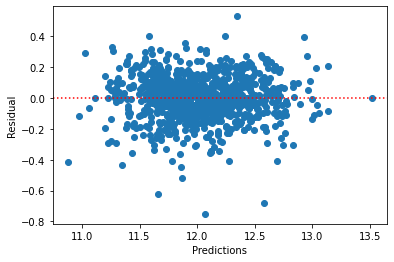

In [1578]:
# Residual analysis
y_res = y_train - y_pred_train
#X_train['res'] = y_res
plt.scatter( y_pred_train , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

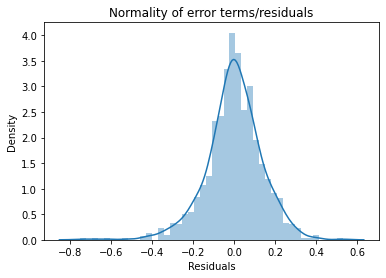

In [1579]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

## Regularization 
### Ridge and Lasso Regression

#### Ridge regression

In [1580]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1581]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 4.0}


In [1626]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 4.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 3.68708385e-02  1.03519096e-01 -8.99858035e-02 -7.59078017e-02
 -4.96497574e-03  8.58183997e-02  3.19577840e-02  1.48714514e-01
  1.61060924e-01  1.37342787e-01  1.04364494e-02  2.42420488e-01
  1.04824323e-01 -2.98351797e-03  9.03241856e-02  7.62456876e-02
  1.92281198e-02 -8.57951876e-02  7.39148463e-02  7.12935797e-02
 -4.62068201e-03  7.51732078e-02  9.12261003e-02  5.01233548e-02
  1.72866567e-02  4.20703063e-02  4.41476404e-02  3.30569921e-02
 -1.15575875e-03  4.45254364e-03 -1.67321939e-02  1.29996163e-02
 -1.14670246e-01  1.35191098e-02  2.19479314e-02 -9.36710286e-03
  9.56056166e-03  4.52848675e-02 -4.78841801e-02 -6.75761819e-03
 -3.76286989e-02  7.03719999e-04 -2.29015825e-02  8.71826657e-02
  5.19128202e-02  6.84456977e-02  4.90495314e-02  5.29835631e-02
  6.25247747e-04  5.53283374e-02  1.57674164e-02  3.83893320e-02
  1.55440254e-03  1.73583576e-02 -1.61456409e-02  1.63242074e-02
 -3.05076509e-02  3.52340106e-02 -2.71151964e-02 -3.13303693e-02
 -1.26398301e-02  7.89325

In [1627]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9407360825614804
0.8805139669184656
9.251748088757985
8.998400497235947
0.009106051268462584
0.02063853325054116


#### Ridge regression with RFE

In [1628]:
### RFE based selecting feature columns
### After trying out trial and error 55 seems to be good choice for rfe
ridge1 = Ridge()
rfe = RFE(ridge1, 55)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [1585]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 56),
 ('LotArea', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', False, 144),
 ('BsmtFinSF1', False, 32),
 ('BsmtUnfSF', False, 94),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 68),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 200),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 6),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 8),
 ('Fireplaces', True, 1),
 ('GarageYrBlt', False, 210),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 33),
 ('OpenPorchSF', False, 132),
 ('3SsnPorch', True, 1),
 ('PoolArea', False, 5),
 ('MiscVal', False, 62),
 ('MoSold', False, 208),
 ('YrSold', False, 203),
 ('MSSubClass_1stryfin', False, 24),
 ('MSSubClass_1strynewer', False, 174),
 ('MSSubClass_1stryolder', True, 1),
 ('MSSubClass_1strypud', False, 192),
 ('MSSubClass_2.5stry', False, 186),
 ('MSSub

In [1629]:
col = X_train.columns[rfe.support_]
col


Index(['LotArea', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'GarageArea', '3SsnPorch',
       'MSSubClass_1stryolder', 'MSSubClass_2strypud', 'MSSubClass_pudmultlvl',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'Alley_Pave', 'Neighborhood_Crawfor',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition2_Feedr',
       'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN',
       'OverallQual_excellent', 'OverallQual_vexcellent', 'OverallQual_vgood',
       'OverallCond_excellent', 'OverallCond_fair', 'OverallCond_good',
       'OverallCond_vgood', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Foundation_Wood', 'BsmtExposure_Gd', 'Heating_GasW', 'CentralAir_Y',
       'Functional_Maj2', 'Functional_Min1', 'Fun

In [1630]:
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'LowQualFinSF',
       'BsmtHalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt',
       'WoodDeckSF',
       ...
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Family',
       'SaleCondition_Normal'],
      dtype='object', length=228)

In [1631]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [1632]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#ridge1 = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge1, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1634]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)


{'alpha': 0.3}


In [1635]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 0.3
ridge1 = Ridge(alpha=alpha)

ridge1.fit(X_train_rfe, y_train)
print(ridge1.coef_)

[ 0.09056688 -0.31186935 -0.09564952  0.26192284  0.18437689  0.2220243
  0.35563599  0.18981044  0.10105195  0.05966311 -0.37076269  0.1139175
  0.0872693   0.1347925   0.09767209 -0.12599189 -0.11340123 -0.12517698
  0.24685633  0.22267669  0.23711816  0.22319743  0.09130378  0.07135781
  0.18401788 -0.15189844  0.09054706  0.08904403  0.07108063  0.14889599
  0.12166076  0.13925056  0.11470144 -0.78806101  0.19138291  0.2197063
  0.07694736  0.14820213 -0.13859405  0.07578149  0.09801472 -0.25278337
  0.08558473 -0.18453733  0.08503613  0.10438796  0.08516689 -0.14716376
  0.07841229 -0.3118231   0.11769045 -0.13261162  0.24517244 -0.10135362
 -0.20227903]


In [1636]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
X_test_rfe = X_test[X_train_rfe.columns]
y_pred_train = ridge1.predict(X_train_rfe)
y_pred_test = ridge1.predict(X_test_rfe)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric4.append(mse_test_lr**0.5)

0.9279751360114625
0.8595851331757225
11.24387193000334
10.574534737367252
0.01106680308071195
0.024253520039833144


#### Lasso regression modelling

In [1637]:
params = {'alpha': [0.00001,0.00005,0.0001,0.0002,0.0003,0.0004, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 33 candidates, totalling 165 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1638]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0004}


In [1639]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0004

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0004)

In [1640]:
lasso.coef_

array([ 3.24806153e-02,  9.37546019e-02, -1.43227059e-01, -8.06889137e-02,
        0.00000000e+00,  6.17090904e-02, -0.00000000e+00,  2.35348770e-01,
        1.48495338e-02,  5.28129049e-02, -0.00000000e+00,  5.40253696e-01,
        1.10189466e-01,  0.00000000e+00,  6.64631775e-02,  5.23363164e-02,
        0.00000000e+00, -1.50677814e-01,  0.00000000e+00,  5.51796760e-02,
       -0.00000000e+00,  5.96723842e-02,  9.37063693e-02,  4.01755531e-02,
        7.70153461e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  2.05120103e-03, -0.00000000e+00,  3.94776552e-03,
       -1.21718645e-01,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  1.12241906e-02, -4.90221201e-02, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  4.60681731e-02,
        0.00000000e+00,  2.93878708e-02,  0.00000000e+00,  1.56294222e-02,
       -0.00000000e+00,  4.42335315e-02,  1.59946000e-03,  0.00000000e+00,
       -5.66031417e-04,  

In [1641]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9377832610566106
0.8806748376603044
9.712715940612581
8.986285446413515
0.009559759784067501
0.020610746436728243


In [1642]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
lr_rfe_metric = pd.Series(metric_lm_rfe, name = 'linear Regression with rfe')
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
rg_metric_rfe = pd.Series(metric4, name = 'Ridge Regression with rfe')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, lr_rfe_metric, rg_metric, rg_metric_rfe, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,linear Regression with rfe,Ridge Regression,Ridge Regression with rfe,Lasso Regression
0,R2 Score (Train),9.553466e-01,0.879155,0.940736,0.927975,0.937783
1,R2 Score (Test),-1.491375e+19,0.747609,0.880514,0.859585,0.880675
2,RSS (Train),6.970887e+00,18.865224,9.251748,11.243872,9.712716
3,RSS (Test),1.123143e+21,19.007368,8.998400,10.574535,8.986285
4,MSE (Train),8.283182e-02,0.136265,0.095426,0.105199,0.097774
5,MSE (Test),1.604997e+09,0.208794,0.143661,0.155735,0.143564


In [1643]:
X.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=283)

In [1644]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=283)

In [1645]:
betas = pd.DataFrame(index=X.columns)

In [1646]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [1673]:
pd.set_option('display.max_rows', None)
betas.head()

,Linear,Ridge,Lasso,Lasso_double,Ridge_double
LotFrontage,0.047297,0.036871,0.032481,0.014183,0.038877
LotArea,0.115848,0.103519,0.093755,0.096575,0.100371
YearBuilt,-0.223787,-0.089986,-0.143227,-0.111868,-0.062894
YearRemodAdd,-0.046277,-0.075908,-0.080689,-0.090849,-0.080864
MasVnrArea,-0.009430,-0.004965,0.000000,0.000000,0.004268


### Conclusions
 Top features which are important for business analysis are as below
- Condition2_PosN: Near positive off-site feature--park, greenbelt, etc.
- GrLivArea: Above grade (ground) living area square feet               
- TotalBsmtSF:Total square feet of basement area              
- OverallQual_vexcellent:Rates the overall material and finish of the house(very excellent)   
- OverallQual_excellent: Rates the overall material and finish of the house(excellent)     
- OverallCond_excellent: Rates the overall condition of the house(excellent)  
- Neighborhood_MeadowV: Physical locations within Ames city limits( Meadow Village)
- KitchenAbvGr: Kitchens above grade
- OverallCond_excellent: Rates the overall condition of the house(excellent)
- YearBuilt: Original construction date
- Neighborhood_Crawfor: Physical locations within Ames city limits (Crawford) 
- MSSubClass_1stryolder: Identifies the type of dwelling involved in the sale(1-STORY 1945 & OLDER)
- BsmtFullBath: Basement full bathrooms             
- Neighborhood_StoneBr : Physical locations within Ames city limits (Stone Brook)    
- OverallQual_vgood: Rates the overall material and finish of the house(very good)         
- LotArea: Lot size in square feet                  
    

#### R2 score 
- Ridge: Train: 94.7% Test: 88.05% 
- Lasso: Train: 93.77% Test: 88.07%

 
### Subjective Questions 

In [1649]:
###lasso 
### double the alpha to see the impact
alpha =0.0008

lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(X_train, y_train) 

Lasso(alpha=0.0008)

In [1650]:
lasso2.coef_

array([ 1.41827459e-02,  9.65750824e-02, -1.11867566e-01, -9.08491267e-02,
        0.00000000e+00,  7.27224947e-02, -0.00000000e+00,  2.26226821e-01,
        0.00000000e+00,  1.27795376e-02, -0.00000000e+00,  5.94453729e-01,
        7.55608584e-02,  0.00000000e+00,  3.23426373e-02,  4.57626720e-02,
        0.00000000e+00, -4.11463957e-02,  0.00000000e+00,  6.17771169e-02,
       -0.00000000e+00,  5.70930482e-02,  1.07152875e-01,  3.64997845e-02,
        9.52384825e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  1.11274120e-03,
       -1.22746244e-01,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  2.24603812e-03, -2.99351089e-02, -9.05656148e-03,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  3.86195707e-02,
        0.00000000e+00,  3.72329333e-02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  2.27594388e-02,  0.00000000e+00,  0.00000000e+00,
       -3.18304349e-03,  

In [1651]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso2.predict(X_train)
y_pred_test = lasso2.predict(X_test)

metric5_ls = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric5_ls.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric5_ls.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric5_ls.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric5_ls.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric5_ls.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric5_ls.append(mse_test_lr**0.5)

0.9260607318439235
0.8825636647631824
11.542731436152486
8.844039341966047
0.01136095613794536
0.02028449390359185


In [1652]:
betas['Lasso_double'] = lasso2.coef_

In [1653]:
alpha = 8.0
ridge2 = Ridge(alpha=alpha)

ridge2.fit(X_train, y_train)
print(ridge2.coef_)

[ 0.03887668  0.10037129 -0.06289398 -0.08086422  0.00426828  0.09052629
  0.03566665  0.13997594  0.15760279  0.1187476   0.00360177  0.21385646
  0.08912294 -0.00524878  0.08723383  0.07417811  0.02690147 -0.05160804
  0.07874209  0.06321284 -0.00921813  0.07203728  0.08966913  0.0503875
  0.02037889  0.02770216  0.03173765  0.02054516 -0.00164945  0.00500911
 -0.00676684  0.02155819 -0.10772916  0.0178352   0.02424382 -0.01264372
  0.01284688  0.04153279 -0.04560978 -0.00361437 -0.03134868 -0.00069958
 -0.01496424  0.0602152   0.03024767  0.04605234  0.0177009   0.03719925
 -0.0005275   0.04940004  0.01594903  0.02651203 -0.00117105  0.01929628
 -0.00868533  0.01509597 -0.01785396  0.03409138 -0.02413908 -0.01842496
 -0.01196825  0.0024132   0.02540117  0.00199344 -0.01137688  0.02306702
  0.02550481 -0.01730698  0.10711184 -0.05383905 -0.01306192 -0.05067186
 -0.10148036 -0.04092829 -0.02184076  0.01879781 -0.03085218  0.0655059
  0.0549595  -0.03434657 -0.00283904 -0.03598548 -0.0

In [1654]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge2.predict(X_train)
y_pred_test = ridge2.predict(X_test)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric5.append(mse_test_lr**0.5)

0.9349101183363357
0.881057679207412
10.161245059508719
8.957453946371132
0.010001225452272361
0.020544619143053056


In [1655]:
betas['Ridge_double'] = ridge2.coef_

In [1656]:
betas[['Ridge', 'Ridge_double']].sort_values("Ridge",ascending = False).head()

,Ridge,Ridge_double
GrLivArea,0.242420,0.213856
1stFlrSF,0.161061,0.157603
TotalBsmtSF,0.148715,0.139976
OverallQual_excellent,0.144400,0.122584
2ndFlrSF,0.137343,0.118748


In [1657]:
betas[['Ridge', 'Ridge_double']].sort_values("Ridge_double",ascending = False).head()

,Ridge,Ridge_double
GrLivArea,0.242420,0.213856
1stFlrSF,0.161061,0.157603
TotalBsmtSF,0.148715,0.139976
OverallQual_excellent,0.144400,0.122584
2ndFlrSF,0.137343,0.118748


In [1658]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']        }



lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
rg2_metric = pd.Series(metric5, name = 'Ridge Regression_alpha_2')

ls_metric = pd.Series(metric3, name = 'Lasso Regression')
ls2_metric = pd.Series(metric5_ls, name = 'Lasso Regression_alpha_2')

final_metric2 = pd.concat([ lr_metric,rg_metric, rg2_metric, ls_metric,ls2_metric], axis = 1)

final_metric2

,Metric,Ridge Regression,Ridge Regression_alpha_2,Lasso Regression,Lasso Regression_alpha_2
0,R2 Score (Train),0.940736,0.934910,0.937783,0.926061
1,R2 Score (Test),0.880514,0.881058,0.880675,0.882564
2,RSS (Train),9.251748,10.161245,9.712716,11.542731
3,RSS (Test),8.998400,8.957454,8.986285,8.844039
4,MSE (Train),0.095426,0.100006,0.097774,0.106588
5,MSE (Test),0.143661,0.143334,0.143564,0.142424


In [1674]:
betas.head()

,Linear,Ridge,Lasso,Lasso_double,Ridge_double
LotFrontage,0.047297,0.036871,0.032481,0.014183,0.038877
LotArea,0.115848,0.103519,0.093755,0.096575,0.100371
YearBuilt,-0.223787,-0.089986,-0.143227,-0.111868,-0.062894
YearRemodAdd,-0.046277,-0.075908,-0.080689,-0.090849,-0.080864
MasVnrArea,-0.009430,-0.004965,0.000000,0.000000,0.004268


In [1680]:
betas['abs_lasso'] = betas['Lasso'].abs()
betas['abs_lasso_double'] =betas['Lasso_double'].abs()
betas['abs_ridge'] = betas['Ridge'].abs()
betas['abs_ridge_double'] = betas['Ridge_double'].abs()

In [1681]:
betas['abs_lasso_double'].sort_values(ascending = False).head(5)

GrLivArea                 0.594454
TotalBsmtSF               0.226227
OverallQual_excellent     0.173682
Neighborhood_MeadowV      0.153060
OverallQual_vexcellent    0.148588
Name: abs_lasso_double, dtype: float64

In [1695]:
betas['abs_lasso'].sort_values(ascending = False).head(15)

Condition2_PosN           0.564466
GrLivArea                 0.540254
TotalBsmtSF               0.235349
OverallQual_vexcellent    0.213126
OverallQual_excellent     0.188031
Neighborhood_MeadowV      0.177825
KitchenAbvGr              0.150678
OverallCond_excellent     0.145798
YearBuilt                 0.143227
Neighborhood_Crawfor      0.139987
MSSubClass_1stryolder     0.121719
BsmtFullBath              0.110189
Neighborhood_StoneBr      0.103929
OverallQual_vgood         0.101692
LotArea                   0.093755
Name: abs_lasso, dtype: float64

In [1682]:
betas['abs_ridge'].sort_values(ascending = False).head(5)

GrLivArea                0.242420
Condition2_PosN          0.172618
1stFlrSF                 0.161061
TotalBsmtSF              0.148715
OverallQual_excellent    0.144400
Name: abs_ridge, dtype: float64

In [1683]:
betas['abs_ridge_double'].sort_values(ascending = False).head(5)

GrLivArea                0.213856
1stFlrSF                 0.157603
TotalBsmtSF              0.139976
OverallQual_excellent    0.122584
2ndFlrSF                 0.118748
Name: abs_ridge_double, dtype: float64

In [1660]:
#####e 5 predictor variables
betas['Ridge'].sort_values(ascending = False).head()

GrLivArea                0.242420
1stFlrSF                 0.161061
TotalBsmtSF              0.148715
OverallQual_excellent    0.144400
2ndFlrSF                 0.137343
Name: Ridge, dtype: float64

In [1661]:
betas['Lasso_double'].sort_values(ascending = False).head()

GrLivArea                 0.594454
TotalBsmtSF               0.226227
OverallQual_excellent     0.173682
OverallQual_vexcellent    0.148588
Neighborhood_Crawfor      0.126460
Name: Lasso_double, dtype: float64

In [1671]:
betas['Lasso'].sort_values(ascending = True).head(5)

Condition2_PosN         -0.564466
Neighborhood_MeadowV    -0.177825
KitchenAbvGr            -0.150678
YearBuilt               -0.143227
MSSubClass_1stryolder   -0.121719
Name: Lasso, dtype: float64

In [1672]:
betas['Lasso'].sort_values(ascending = False).head(5)

GrLivArea                 0.540254
TotalBsmtSF               0.235349
OverallQual_vexcellent    0.213126
OverallQual_excellent     0.188031
OverallCond_excellent     0.145798
Name: Lasso, dtype: float64

#### Building model without top 5 predictors variables for Lasso

In [1687]:
X_train_wo_top_5 = X_train.drop(['Condition2_PosN','GrLivArea','TotalBsmtSF', 'OverallQual_vexcellent', 'OverallQual_excellent','Neighborhood_Crawfor'],axis =1)
params = {'alpha': [0.00001,0.00005,0.0001,0.0002,0.0003,0.0004, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso_wo = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso_wo, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_wo_top_5, y_train) 

Fitting 5 folds for each of 33 candidates, totalling 165 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1689]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0004}


In [1690]:
alpha =0.0004

lasso_wo = Lasso(alpha=alpha)
        
lasso_wo.fit(X_train_wo_top_5, y_train) 

Lasso(alpha=0.0004)

In [1691]:
betas1= pd.DataFrame(index=X_train_wo_top_5.columns)
betas1['lasso_wo_top_5'] = lasso_wo.coef_

In [1692]:
betas1['lasso_wo_top_5'].sort_values(ascending = False).head(20)

1stFlrSF                 0.483042
2ndFlrSF                 0.414405
BsmtFinSF1               0.158828
Neighborhood_StoneBr     0.142983
OverallCond_excellent    0.135172
BsmtFullBath             0.119560
LotArea                  0.111520
BsmtUnfSF                0.097697
Condition2_Norm          0.094054
OverallCond_vgood        0.091411
Neighborhood_NridgHt     0.090592
Functional_Typ           0.088155
Exterior1st_BrkFace      0.086862
Fireplaces               0.082763
GarageArea               0.082652
OverallCond_good         0.079042
CentralAir_Y             0.074622
GarageCars               0.072436
Neighborhood_NoRidge     0.066399
BsmtCond_TA              0.064515
Name: lasso_wo_top_5, dtype: float64

In [1693]:
betas1['abs_lasso_wo_top_5'] = betas1['lasso_wo_top_5'].abs()

In [1694]:
betas1['abs_lasso_wo_top_5'].sort_values(ascending = False).head(10)

1stFlrSF                 0.483042
2ndFlrSF                 0.414405
Neighborhood_MeadowV     0.197678
BsmtFinSF1               0.158828
Neighborhood_StoneBr     0.142983
MSSubClass_1stryolder    0.140416
KitchenAbvGr             0.138561
OverallCond_excellent    0.135172
BsmtFullBath             0.119560
LotArea                  0.111520
Name: abs_lasso_wo_top_5, dtype: float64